### Idea is to develop a simple linear regression model to predict housing prices.
Steps to take:-
- Data Preparation
- Data Exploration and Processing
- Build the model
- Evaluate the model
- Prediction
- Visualize the Results
- Document the Insights.

In [20]:
## Importing the needed packages 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
## Loading the data

df= pd.read_csv("C:/Users/Francis Mwangi/Desktop/BI/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data Exploration and Preprocessing

In [22]:
## Checking for missing values.

missing_values =df.isnull().sum()

missing_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
# Impute missing values in LotFrontage with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

# Check again for missing values to ensure they're handled
missing_values_after = df.isnull().sum()
print(missing_values_after)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [24]:
## Checking for Duplicate values.

df.duplicated().any()

False

In [25]:
##Getting a statisctical overview of the numerical columns in the dataset.

starts_overview = df.describe()

starts_overview

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
## Targeting the columns that 

high_priority_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd'
]

# Add the target variable 'SalePrice' to the list
features_to_use = high_priority_features + ['SalePrice']

# Create a new DataFrame with only the high-priority features and the target variable
df_high_priority = df[features_to_use]

# Display the first few rows to ensure the correct columns are selected
df_high_priority.head()


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,SalePrice
0,7,1710,2,548,856,856,2,2003,2003,8,208500
1,6,1262,2,460,1262,1262,2,1976,1976,6,181500
2,7,1786,2,608,920,920,2,2001,2002,6,223500
3,7,1717,3,642,756,961,1,1915,1970,7,140000
4,8,2198,3,836,1145,1145,2,2000,2000,9,250000


In [27]:
# Filter the dataset to include only high-priority features
df_filtered = df[high_priority_features + ['SalePrice']]

# Check for any missing values in the filtered dataset
missing_values_filtered = df_filtered.isnull().sum()

# Handle missing values - for simplicity, fill with median values
df_filtered = df_filtered.fillna(df_filtered.median())


In [28]:
# Separate features and target variable
X = df_filtered.drop('SalePrice', axis=1)
y = df_filtered['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Print the shapes to confirm
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape:  {X_test.shape}')
print(f'y_test shape:  {y_test.shape}')


X_train shape: (1168, 10)
y_train shape: (1168,)
X_test shape:  (292, 10)
y_test shape:  (292,)


In [29]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Development - Linear Regression

In [30]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)


LinearRegression()

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 24774.22
Root Mean Squared Error (RMSE): 39474.54


In [32]:
# Example of new data (replace with actual data)
sample_data = np.array([[6, 1500, 2, 500, 1000, 800, 2, 2000, 1990, 6]])  # Replace with appropriate feature values

# Scale the new data
sample_data_scaled = scaler.transform(sample_data)

# Make predictions
sample_predictions = model.predict(sample_data_scaled)

print(f'Sample Predictions: {sample_predictions}')

# Print the predicted sale price
print(f'Sample Prediction for new data: {sample_predictions}')



Sample Predictions: [180756.99456524]
Sample Prediction for new data: [180756.99456524]


C:\Users\Francis Mwangi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Visualizing the Results

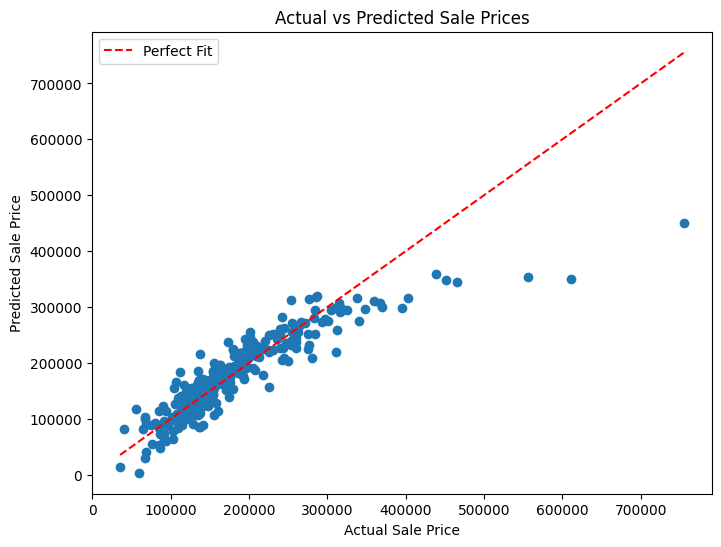

In [33]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.legend()
plt.show()

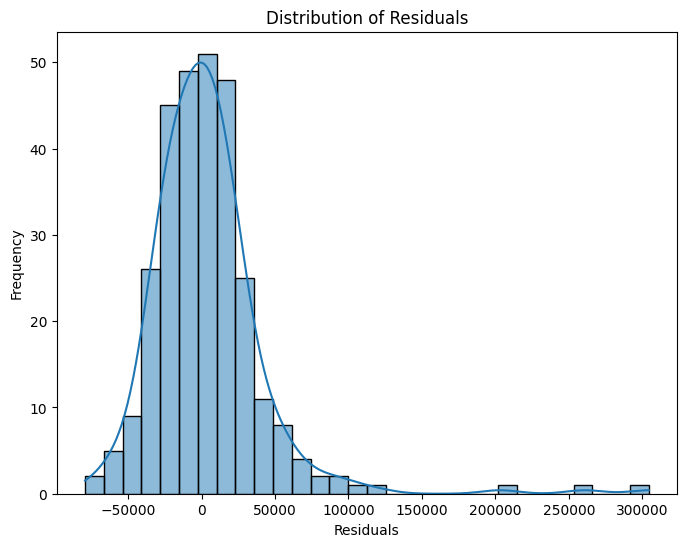

In [34]:
# Plot residuals to visualize the error distribution
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [35]:
###  Summary and Insights

print("Summary:")
print(f"The linear regression model was trained on high-priority features like OverallQual, GrLivArea, and YearBuilt.")
print(f"Model performance shows an MAE of {mae:.2f} and RMSE of {rmse:.2f}.")
print("These metrics indicate that the model can predict housing prices with reasonable accuracy.")
print("However, further feature engineering and model optimization may improve performance.")


Summary:
The linear regression model was trained on high-priority features like OverallQual, GrLivArea, and YearBuilt.
Model performance shows an MAE of 24774.22 and RMSE of 39474.54.
These metrics indicate that the model can predict housing prices with reasonable accuracy.
However, further feature engineering and model optimization may improve performance.
